In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates

In [8]:
s=500
ds = 50
t = 600
dt = 20
v,s,t,ds,dt = sp.symbols('v,s,t,ds,dt')

v = s/t

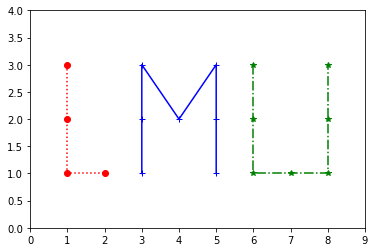

In [13]:
plt.plot([1,1,1,2],[3,2,1,1],'r:o')
plt.plot([3,3,3,4,5,5,5],[1,2,3,2,3,2,1],'b-+')
plt.plot([6,6,6,7,8,8,8],[3,2,1,1,1,2,3],'g-.*')
plt.axis([0,9,0,4])
plt.show()

Text(0.5, 1.0, 'DOAS measurements using 3 different light paths')

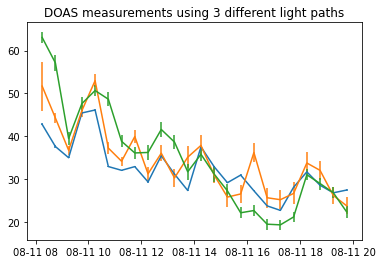

In [63]:
#plotting no2 doas data
data = np.array([[float(i) for i in (' '.join(line.split())).split(' ')] for line
in open('NO2_DOAS_data.txt').readlines()[1:]])

x = dates.num2date(data[:,0])
measure1 = data[:,1]
uncert1 = data[:,2]
measure2 = data[:,3]
uncert2 = data[:,4]
measure3 = data[:,5]
uncert3 = data[:,6]

plt.errorbar(x, measure1, yerr=uncert1)
plt.errorbar(x,measure2, yerr=uncert2)
plt.errorbar(x,measure3, yerr=uncert3)
plt.title('DOAS measurements using 3 different light paths')

In [31]:
np.shape(data)

(24, 7)

2*c**2*h/(lam**5*(exp(c*h/(T*k*lam)) - 1))
-10*c**2*h/(lam**6*(exp(c*h/(T*k*lam)) - 1)) + 2*c**3*h**2*exp(c*h/(T*k*lam))/(T*k*lam**7*(exp(c*h/(T*k*lam)) - 1)**2)
2*T**6*k**6*x**7*exp(x)/(c**4*h**5*(exp(x) - 1)**2) - 10*T**6*k**6*x**6/(c**4*h**5*(exp(x) - 1))
L subs no const: 	2*x**6*(x*exp(x) - 5*exp(x) + 5)/(1 - exp(x))**2
The minimum f(x) = -0.0008658866055567976	for x = 4.9651100000194255


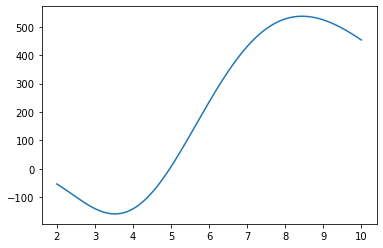

In [54]:
#deriving wien´s displacement

lam, T, h, c, k, x = sp.symbols('lam, T, h, c, k, x')

L_dlam = (2*h*c**2)/(lam**5*(sp.exp(h*c/(k*T*lam))-1))
print(L_dlam)
L = sp.diff(L_dlam, lam)
print(L)
L_subs = L.subs(lam, 1/x/k/T*h*c)
print(L_subs)
L_subs_no_const = L_subs*(c**4*h**5)/(T**6*k**6)
L_subs_no_const = L_subs_no_const.simplify()
print('L subs no const: \t' + str(L_subs_no_const))

f = sp.utilities.lambdify(x, L_subs_no_const, 'numpy')
a = np.arange(2.0, 10, 0.00001)
mini=10.0
mini_x = 0
out = f(a)
plt.plot(a,out)
for i in np.arange(2.0, 10, 0.00001):
    if(abs(f(i))<abs(mini)): 
        mini = f(i)
        mini_x = i
print('The minimum f(x) = ' + str(mini) + '\tfor x = ' + str(mini_x)) 

In [43]:
out.shape

(800,)

Process LIDAR Measurements

In [63]:
data_yalis = np.loadtxt('yalis_130417_raw.txt', delimiter=',')

In [64]:
data_yalis_corr1 = data_yalis
for i in np.arange(len(data_yalis)):
    add = 0
    for j in range(10):
        add = add+data_yalis[i][len(data_yalis)-j]
    data_yalis_corr1[i][:]=data_yalis[i][:]-add/10